## 导入工具包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 读取数据

In [2]:
"""
读取数据集
"""
test_data = pd.read_csv("../data/test_format1.csv")
train_data = pd.read_csv("../data/train_format1.csv")
user_info = pd.read_csv("../data/user_info_format1.csv")
user_log = pd.read_csv("../data/user_log_format.csv")

## 数据集样例查看

查看数据集的前几行数据，了解训练集、测试集、用户信息、用户日志字段信息

In [3]:
train_data.head(3)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1


In [4]:
test_data.head(3)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN


In [5]:
user_info.head(3)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0


In [6]:
user_log.head(3)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0


## 查看数据类型和数据大小

In [7]:
"""
查看用户信息数据
"""
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [8]:
"""
查看用户行为数据
"""
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206570 entries, 0 to 206569
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      206570 non-null  int64  
 1   item_id      206570 non-null  int64  
 2   cat_id       206570 non-null  int64  
 3   seller_id    206570 non-null  int64  
 4   brand_id     206323 non-null  float64
 5   time_stamp   206570 non-null  int64  
 6   action_type  206570 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 11.0 MB


In [9]:
"""
查看用户购买训练数据
"""
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


## 查看缺失值

### 年龄缺失值

In [10]:
"""
年龄缺失值
"""
(user_info.shape[0] - user_info['age_range'].count())/user_info.shape[0]

0.005226677982884221

In [11]:
"""
统计了age_range列中值为NaN或0的行的数量。
isna() 表示非数字。user_info['age_range']这一列非数字的行
"""
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [12]:
"""
user_info.groupby(['age_range'])：这一部分是通过 'age_range' 列对数据框进行分组，创建了一个分组对象。
[['user_id']]：选择了分组后的 'user_id' 列，形成一个新的数据框。
.count()：对每个分组计算 'user_id' 列的计数。这将返回一个包含 'age_range' 和相应计数的数据框。
"""

user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


### 性别缺失值

In [13]:
# 性别缺失率
(user_info.shape[0] - user_info['gender'].count())/user_info.shape[0]

0.01517316170403376

In [14]:
user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [15]:
"""
性别缺失或者性别为空的时候，可以认为数据缺失
"""
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


### 查看用户行为日志数据缺失情况

In [16]:
user_log.isna().sum()

user_id          0
item_id          0
cat_id           0
seller_id        0
brand_id       247
time_stamp       0
action_type      0
dtype: int64

可以看出user_log中brand_id缺失了247条

## 观察数据分布

### 查看整体数据统计信息

In [17]:
user_info.describe()

,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476178,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


In [18]:
user_log.describe()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
count,206570.000000,2.065700e+05,206570.000000,206570.000000,206323.000000,206570.000000,206570.000000
mean,221338.846798,5.559340e+05,876.028286,2428.755226,4092.560931,912.451440,0.272121
std,121532.739767,3.206803e+05,448.886584,1482.177621,2355.210494,201.688091,0.779562
min,16.000000,2.000000e+00,1.000000,1.000000,1.000000,511.000000,0.000000
25%,119911.000000,2.786538e+05,559.000000,1113.000000,2000.000000,720.000000,0.000000
50%,225681.000000,5.609980e+05,821.000000,2418.000000,3997.000000,1006.000000,0.000000
75%,325971.000000,8.286280e+05,1252.000000,3760.000000,6065.000000,1110.000000,0.000000
max,424070.000000,1.113147e+06,1671.000000,4995.000000,8476.000000,1111.000000,3.000000


### 查看正负样本的分布，并可视化显示

In [3]:
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本的数量： \n', label_gp)

正负样本的数量： 
 label
0    244912
1     15952
Name: user_id, dtype: int64


([<matplotlib.patches.Wedge at 0x262d20c16d0>,
 [Text(-1.07976384806906, 0.2100238853156861, 'Negative'),
  Text(1.0797638652749295, -0.2100237968577469, 'Positive')],
 [Text(-0.5889620989467599, 0.11455848289946513, '93.9%'),
  Text(0.5889621083317796, -0.11455843464968012, '6.1%')])

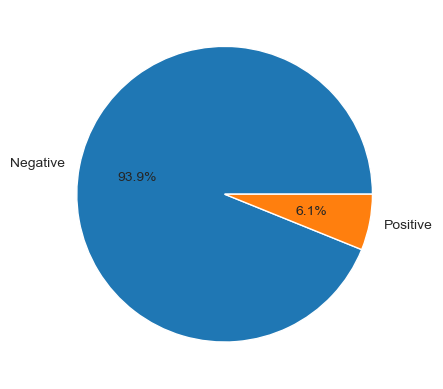

In [20]:
plt.pie(label_gp, labels=['Negative', 'Positive'], autopct='%1.1f%%')

<BarContainer object of 2 artists>

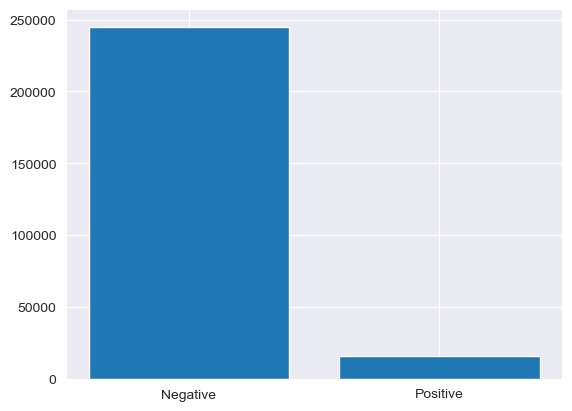

In [21]:
plt.bar(['Negative', 'Positive'], label_gp)

从图中可以看出，样本的分布不均衡，需要采用一定的措施处理样本。

## 探查影响复购的各种因素

### 对店铺的分析

分析不同店铺与复购的关系，并可视化显示

In [22]:
"""
分析不同店铺与复购的关系，并可视化显示
"""
print('选取top5的店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))

选取top5的店铺
店铺	购买次数
merchant_id
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: count, dtype: int64


In [4]:
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044, 3828, 4173, 1102, 4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5'] == 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


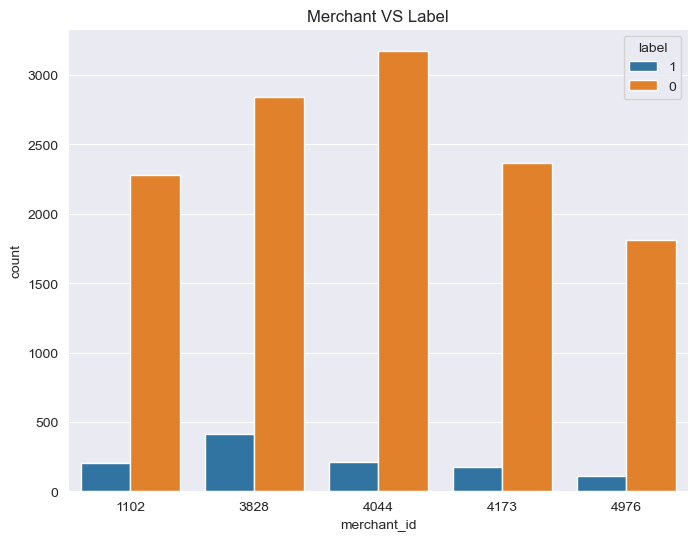

In [26]:
plt.figure(figsize=(8, 6))
plt.title('Merchant VS Label')
plt.legend(title='label')
"""
这里直接使用原来信息的label会报错“'numpy.int64' object has no attribute 'startswith'”
因为原来的label只有0和1，而matplotlib期望得到的label series是object/string，而我们传入了一个int64
加上下面那一行，将这个类型强转为string类型即可。
"""
train_data_merchant['label'] = train_data_merchant['label'].astype(str)
"""
书上这一行也跑不动，这里data要放在第一位，且要指定一下x的值，然后才能跑出来。
"""
sax = sns.countplot(train_data_merchant, x='merchant_id', hue='label')

查看店铺的复购分布

In [5]:
merchant_repeat_buy = [rate for rate in train_data.groupby('merchant_id')['label'].mean() if 1 >= rate > 0]

((array([-3.33808479, -3.08323587, -2.94165416, ...,  2.94165416,
          3.08323587,  3.33808479]),
  array([0.00483092, 0.0049505 , 0.005     , ..., 0.35      , 0.43243243,
         0.52941176])),
 (0.04432673682235349, 0.0662134249238816, 0.9093465643346752))

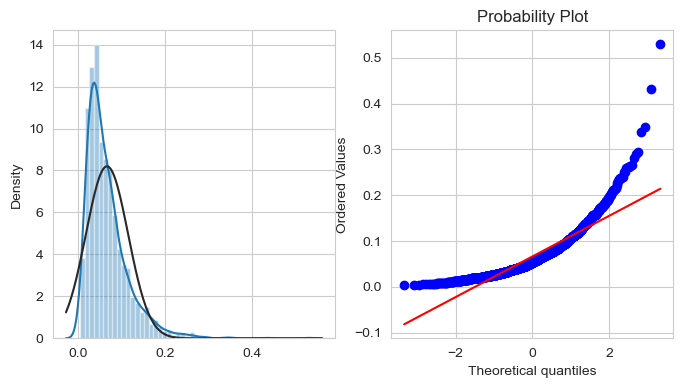

In [6]:
plt.figure(figsize=(8, 4))
"""
sns.distplot 用来绘制单变量的分布的直方图和拟合的概率密度函数。
stats.norm 表示在绘制的分布图上添加了一条正态分布的拟合曲线，以便比较样本数据的分布与正态分布的拟合情况。途中的黑线表示拟合的正态分布的情况。
"""
plt.subplot(1, 2, 1)
sns.distplot(merchant_repeat_buy, fit=stats.norm)
"""
probplot 绘制概率图（Probability Plot）。概率图是一种用于评估样本数据是否来自某一特定分布的图形工具。
Quantile-Quantile (Q-Q) 图的横纵坐标分别表示样本分位数和理论分位数。这两者之间的比较能够帮助判断样本数据是否符合某一理论分布。
具体来说，Q-Q 图的横坐标是理论分位数，纵坐标是样本分位数。
红线是理论的，x轴的，正态分布的分位数分布。
蓝点是实际的，y轴的，不符合正态分布的分位数分布。
"""
plt.subplot(1, 2, 2)
stats.probplot(merchant_repeat_buy, plot=plt)

从左图中可以看出有存在复购行为的店铺，其复购率分布在0~0.3之间
从右图中可以看出这种复购行为不太符合正态分布

### 对用户的分析

In [44]:
user_repeat_buy = [
    rate for rate in train_data.groupby(['user_id'])['label'].mean()
    if 0 < rate <= 1
]

左图黑色曲线表示正态分布的拟合曲线，用来比较该分布和正态分布。
蓝色曲线是单变量分布直方图的拟合曲线，从图中可以看出我们的变量分布不是正态分布。
右图是Q-Q图，红线表示正态分布的分位数分布曲线，蓝线是我们的样本点的分位数，从这个图中也可以看出，我们的分布不符合正态分布。


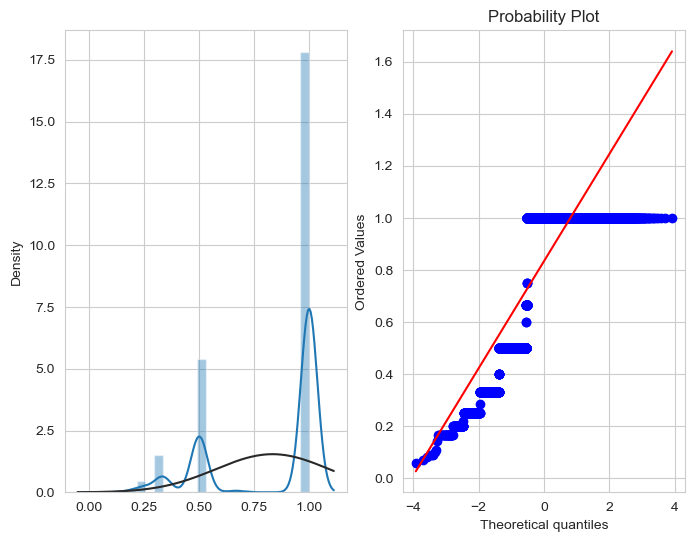

In [45]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.distplot(user_repeat_buy, fit=stats.norm)
plt.subplot(1, 2, 2)
res = stats.probplot(user_repeat_buy, plot=plt)

### 对用户性别的分析

In [8]:
"""
分析用户性别和复购的关系并可视化显示
"""
train_data_user_info = train_data.merge(user_info, on=['user_id'], how='left')

In [10]:
train_data_user_info.head(3)

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0


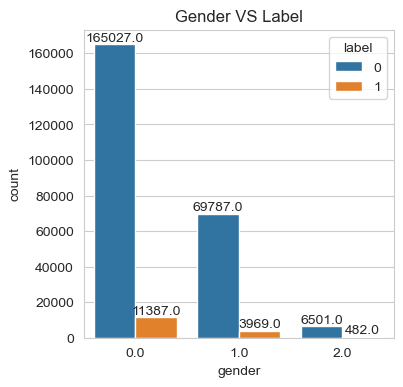

In [18]:
plt.figure(figsize=(4, 4))

"""
和上面相同的两个问题，首先是label的类型问题，然后就是countplot的用法
"""
train_data_user_info['label'] = train_data_user_info['label'].astype(str)
plt.title("Gender VS Label")
ax = sns.countplot(train_data_user_info, x='gender', hue='label')
for p in ax.patches:
    height = p.get_height()
    # 下面这一行用于设置文本标签，但是书上没写。
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

In [32]:
"""
查看用户性别复购的分布
"""
# 这里label应该改成int类型了，不然会报错
train_data_user_info['label'] = train_data_user_info['label'].astype(int)
repeat_buy = [
    rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()
]

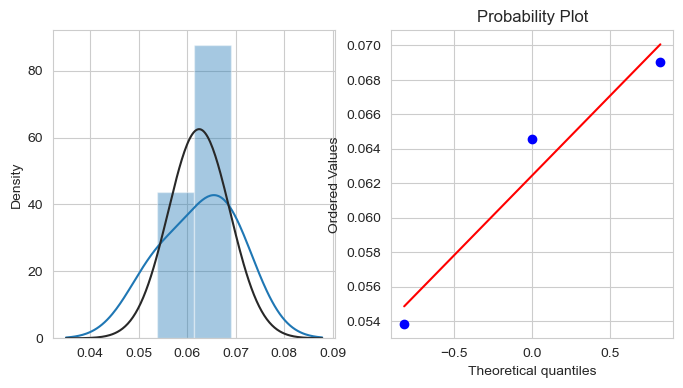

In [34]:
plt.figure(figsize=(8,4))

ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot=plt)

### 对用户年龄的分析

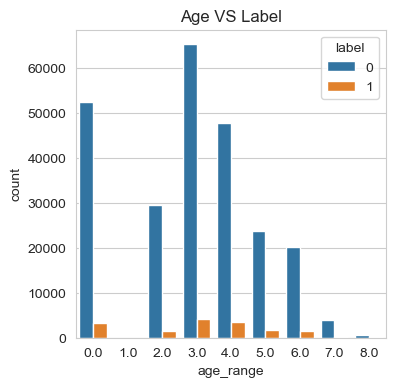

In [38]:
"""
分析用户年龄和复购关系并可视化显示
"""
plt.figure(figsize=(4,4))
plt.title('Age VS Label')
train_data_user_info['label'] = train_data_user_info['label'].astype(str)
ax = sns.countplot(train_data_user_info, x='age_range', hue='label')

In [40]:
"""
查看用户年龄复购的分布
"""
train_data_user_info['label'] = train_data_user_info['label'].astype(int)
repeat_buy = [
    rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()
]

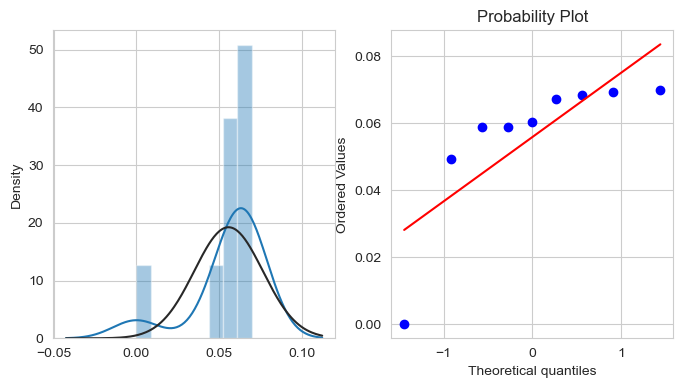

In [42]:
plt.figure(figsize=(8,4))

ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot=plt)